# **Introduction**

This EDA aims to identify the key factors in producing a successful and profitable movie. To accomplish this I plan on implementing various methods of cleaning, merging, and analysis primarily using pandas along with some other third party libraries.

### **Objectives**
- **Primary Goal**: To identify factors that significantly influence a movie's worldwide gross this will consequently validate what is needed for a successful movie studio. 
- **Specific Aims**:
  - Clean and format the provided movie datasets.
  - Merge the datasets to form a single and complete dataset for analysis.
  - Analyze the dataset and create visualizations to support analysis findings. 
  - Provide three business recommendations based on the analysis.

### **Data Sources**
- **BOM Movie Gross**: Data on movie grosses from Box Office Mojo.
- **IMDB Data**: SQL database containing movie basics and ratings from IMDB.
- **TMDB Movies**: Information and popularity scores from The Movie DB.
- **TN Movie Budgets**: Data on movie budgets and grosses.

### **Methodology**
The analysis follows these steps:
1. **Data Cleaning and Preparation**: Addressing missing values, transforming variables, and ensuring data consistency.
2. **Data Merging**: Combining the datasets into a single complete dataset.
3. **Exploratory Data Analysis**: Inspecting and visualizing data distributions and relationships.
 

# **Exploratory Data Analysis (EDA) of Provided Movie Data**

## **Importing Created Load Functions**

Below, I am importing the functions that I made to load the datasets from their source files. Along with any needed libraries for my analysis.

In [1]:
import os
import sys

#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing load functions
from load_data import load_bom_movie_gross, load_tmdb_movies, load_tn_movie_budgets, load_sqlite_db
import data_preparation as dp

## **Working Directory Troubleshoot**

For some reason, when calling my load functions in this EDA notebook, they weren't working properly. So, I had to set the project root in order for it to work. 

In [2]:
project_root = '/Users/unknown1/Documents/02_School/01_Flatiron 2024/04_Phase_2_Final_Project/Movie-and-Box-Office-Analysis'
os.chdir(project_root)

code_directory = os.path.join(project_root, 'code')
if code_directory not in sys.path:
    sys.path.append(code_directory)

print("Python path:", sys.path)
print("Contents of code directory:", os.listdir(code_directory))

Python path: ['/Users/unknown1/anaconda3/envs/learn-env/lib/python312.zip', '/Users/unknown1/anaconda3/envs/learn-env/lib/python3.12', '/Users/unknown1/anaconda3/envs/learn-env/lib/python3.12/lib-dynload', '', '/Users/unknown1/anaconda3/envs/learn-env/lib/python3.12/site-packages', '/Users/unknown1/Documents/02_School/01_Flatiron 2024/04_Phase_2_Final_Project/Movie-and-Box-Office-Analysis/code']
Contents of code directory: ['EDA of Provided Movie Data.ipynb', '__init__.py', '__pycache__', 'visualizations.py', 'merge_data.py', '.ipynb_checkpoints', 'data_preparation.py', 'load_data.py']


In [3]:
# creating a function to load all of the imported load functions
def load_all_data():
    bom_movie_gross_df = load_bom_movie_gross()
    tmdb_movies_df = load_tmdb_movies()
    tn_movie_budgets_df = load_tn_movie_budgets()
    
    return bom_movie_gross_df, tmdb_movies_df, tn_movie_budgets_df

# load all datasets
bom_movie_gross_df, tmdb_movies_df, tn_movie_budgets_df = load_all_data()

## **Initial Inspection of All Datasets**

In the below section, I am performing the initial inspections to better understand the structure and identify any possible issues. The below code is just a preferred method I use when gathering initial information on datasets.

In [4]:
# displaying the first few rows and some info of bom_movie_gross dataset
print("BOM Movie Gross Data: ")
print(bom_movie_gross_df.head())
print(bom_movie_gross_df.info())
print(bom_movie_gross_df.describe())
print(bom_movie_gross_df.isnull().sum())

BOM Movie Gross Data: 
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year         

In [5]:
# displaying the first few rows and some info of tmdb_movies dataset
print("TMDB Movies Data:")
print(tmdb_movies_df.head())
print(tmdb_movies_df.info())
print(tmdb_movies_df.describe())
print(tmdb_movies_df.isnull().sum())

TMDB Movies Data:
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10

In [6]:
# displaying the first few rows and some info of tn_movie_budgets dataset
print("TN Movie Budgets Data:")
print(tn_movie_budgets_df.head())
print(tn_movie_budgets_df.info())
print(tn_movie_budgets_df.describe())
print(tn_movie_budgets_df.isnull().sum())

TN Movie Budgets Data:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1 

In [7]:
# loading the relevant tables
movie_basics_df, movie_ratings_df = load_sqlite_db()

# displaying the first few rows of each table
print("Movie Basics Data:")
print(movie_basics_df.head())
print(movie_basics_df.info())
print(movie_basics_df.describe())
print(movie_basics_df.isnull().sum())

print("\nMovie Ratings Data:")
print(movie_ratings_df.head())
print(movie_ratings_df.info())
print(movie_ratings_df.describe())
print(movie_ratings_df.isnull().sum())

Movie Basics Data:
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           ---------

## **Data Cleaning and Merging**
All functions used can be found in the `data_preparation.py` file for a deeper look. 

### **Cleaning BOM Movie Gross Data**
The initial inspection revealed several issues such as missing values, inconsistent data types, and unwanted special characters that could cause issues with the analysis. 

### **Cleaning Imported im.db Tables (`movie_basics` and `movie_ratings`)**
The initial inspection revealed that these tables had some missing values that needed to be resolved. Some imputation methods were utilized to remove nan values without skewing the data. 

### **Cleaning `tn_movie_budgets` Dataset**
The initial inspection revealed that this dataset had no missing data and only needed some special character formatting for a smooth analysis. 

### **Cleaning `tmdb_movies` Dataset**
The initial inspections revealed that this dataset had an index column that needed to be removed, along with some data types that needed to be modified for accuracy. 

### **Merging Datasets**
After cleaning each dataset, they were merged into a single dataframe to help in a complete and accurate analysis. The merging process involved joining the datasets on relevant keys and ensuring consistency across all columns. Later in this EDA it was discovered that some log transformation was needed. This required some zero values to be handled before a log transformation was possible. 

The functions created to accomplish this are also located in the `data_preparation.py` file.

In [8]:
# importing my data prep file to begin the cleaning and merging process
import data_preparation as dp

# cleaning and merging datasets using my full_clean function
merged_df = dp.full_clean()

# displaying merged data and its columns
print("Merged Data:")
print(merged_df.head())
print("Columns in Merged Data:")
print(merged_df.columns)


Merged Data:
                        title studio  domestic_gross  foreign_gross  \
0                 Toy Story 3     BV     415000000.0    652000000.0   
1                   Inception     WB     292600000.0    535700000.0   
2         Shrek Forever After   P/DW     238700000.0    513900000.0   
3  The Twilight Saga: Eclipse   Sum.     300500000.0    398000000.0   
4                  Iron Man 2   Par.     312400000.0    311500000.0   

   production_budget  year  runtime_minutes                      genres  \
0        200000000.0  2010            103.0  Adventure,Animation,Comedy   
1        160000000.0  2010            148.0     Action,Adventure,Sci-Fi   
2        165000000.0  2010             93.0  Adventure,Animation,Comedy   
3         68000000.0  2010            124.0     Adventure,Drama,Fantasy   
4        170000000.0  2010            124.0     Action,Adventure,Sci-Fi   

   average_rating  num_votes  ...  tmdb_vote_average  tmdb_vote_count  \
0             8.3     682218  ...   

# **Statistical Analysis**

Now that I have selected the data needed for this analysis, cleaned the chosen data, and merged it into one dataset; I can now begin creating features, and visualizations that will assist in coming up with the requested business recommendations. 

## **Log-Transformed Data Visualization**
I visualized the distributions of both original and log-transformed columns to check for normalization effects. Log transformation helps in reducing skewness and making the data more normally distributed, which is important for an accurate analysis. 

As shown below, the distributions of the original data are right-skewed with a tail towards the higher values. Due to some movies with extremely high gross values, the original data is a bit distorted. This can be resolved with log transformation. 

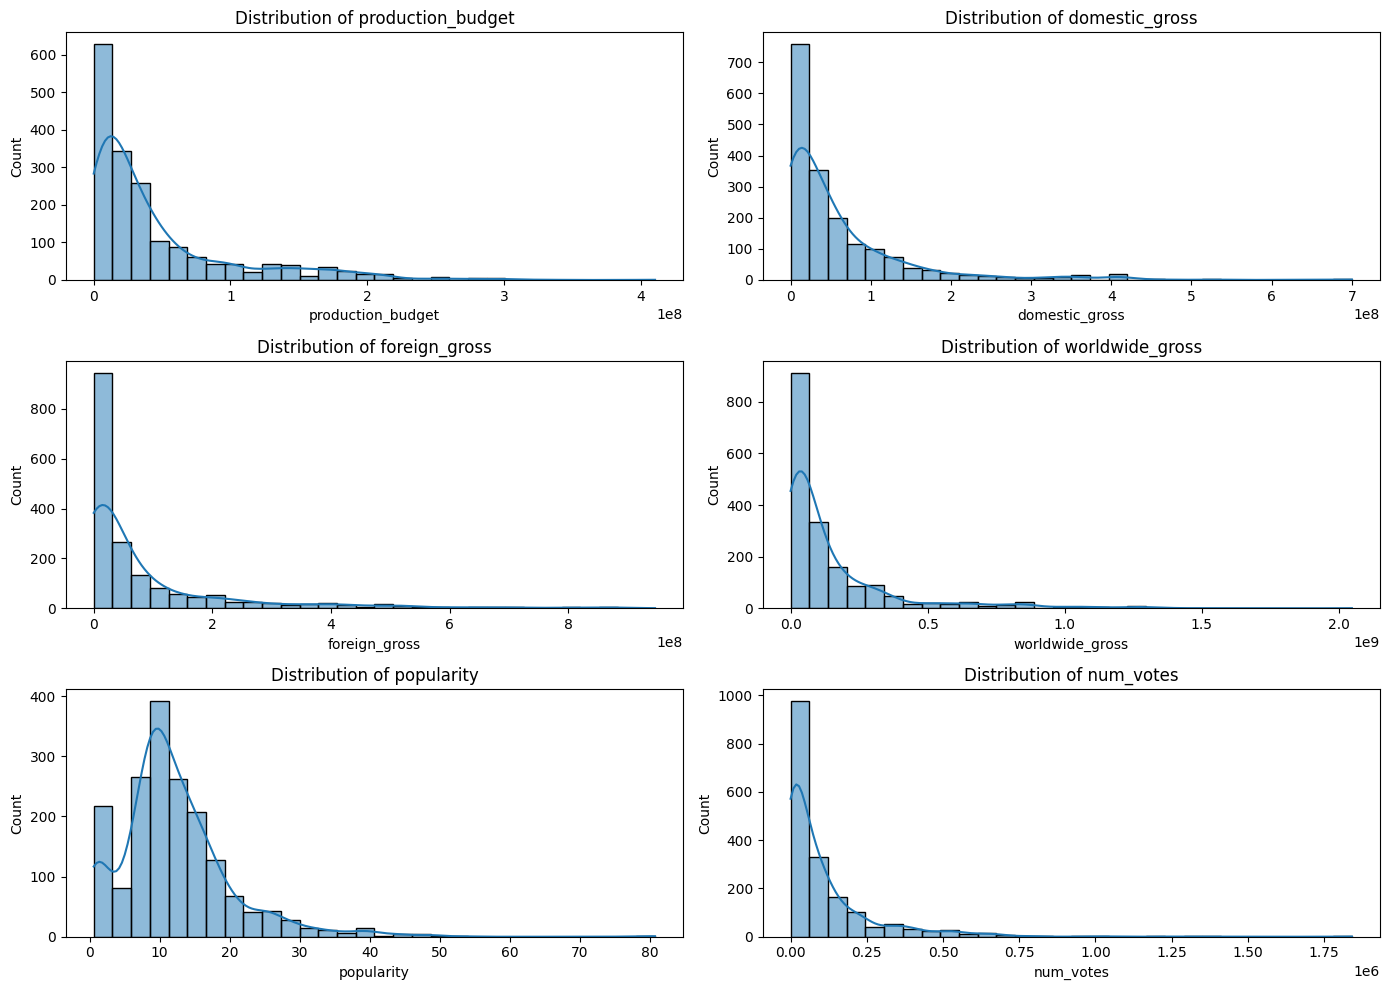

In [9]:
# defining columns to visualize for normalization checks
columns_to_visualize = [
    'production_budget', 'domestic_gross', 'foreign_gross', 
    'worldwide_gross', 'popularity', 'num_votes'
]

# plotting distributions for specified columns
plt.figure(figsize=(14, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 2, i)
    sns.histplot(merged_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

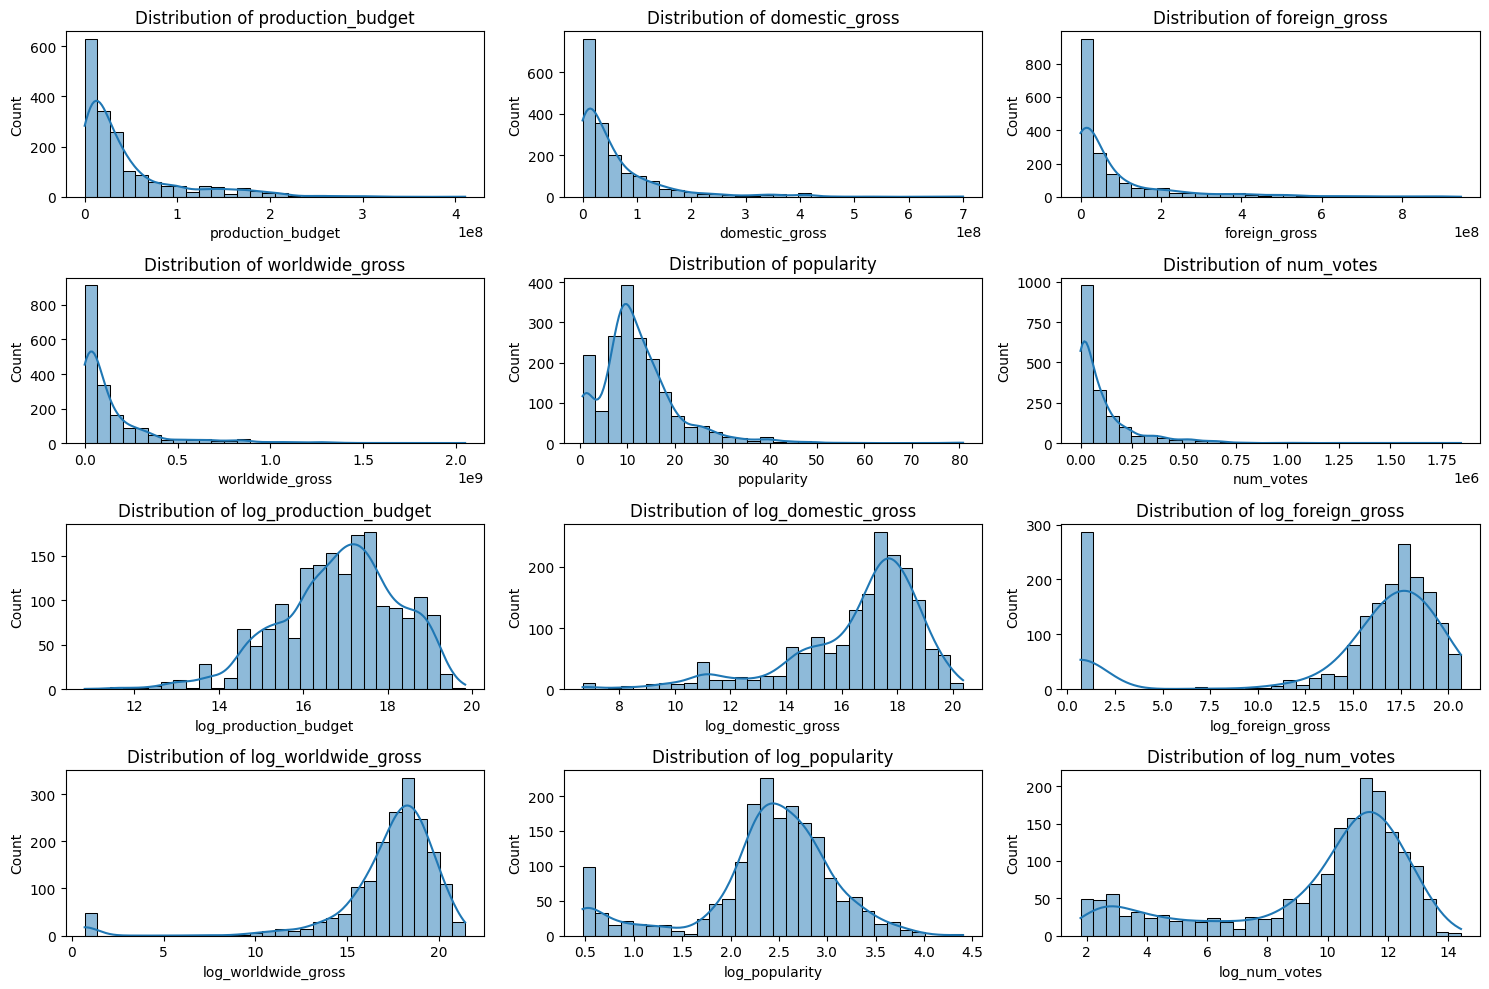

In [10]:
# defining columns to visualize, including log-transformed versions
columns_to_visualize = [
    'production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'popularity', 'num_votes',
    'log_production_budget', 'log_domestic_gross', 'log_foreign_gross', 'log_worldwide_gross', 'log_popularity', 'log_num_votes'
]

# plotting distributions of original and log-transformed columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(4, 3, i)
    sns.histplot(merged_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

## **Correlation Heatmap**
I plotted a correlation heatmap to visualize the relationships between numerical features. Here are some of useful correlations to note are: 

- `domestic_gross` and `foreign_gross` have a strong positive correlation (0.83) suggesting that movies that do well domestically usually have similar success internationally. 
- `production_budgets` and both `domestic` and `foreign` gross earnings have a high correlation (0.69 and 0.76) indicating that higher production budgets usually lead to higher earnings.
- It can also be seen that the log transformed values and the original values are showing good correlation. This supports that there is a consistent relationship between values even after transformation. 
- `production_budget` also has a moderate correlation (0.52) with popularity, indicating that a higher production budget leads to more popular movies.
- `runtime_minutes` has a moderate correlation (0.41) suggesting that longer movies lead to more votes, which could possibly lead to a higher popularity this can be validated with the correlation seen between popularity and `num_votes`.

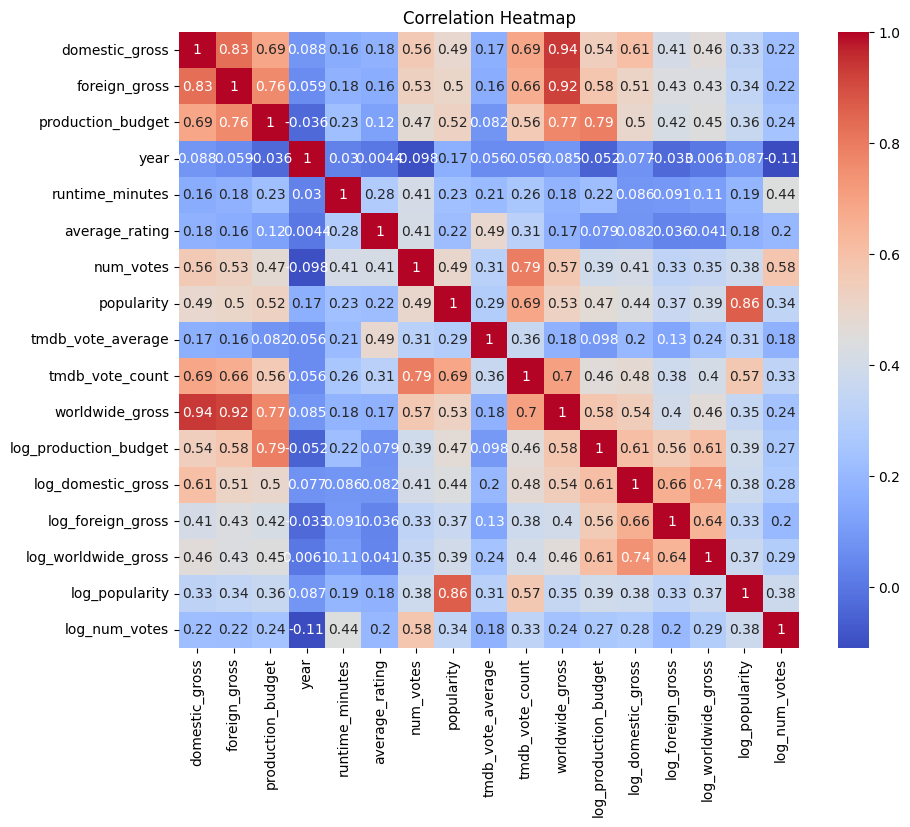

In [11]:
# selecting numerical columns for correlation analysis
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Scatter Plot of Domestic Gross vs. Foreign Gross**

To further support what I noted from the heatmap above, I plotted a scatter plot to confirm the correlation between `domestic_gross` and `foreign_gross`. The scatter plot shows a positive trend, where higher domestic gross is associated with higher foreign gross. With this being said, it confirms that movies released domestically, tend to do well when released internationally also. In turn increasing revenue. 

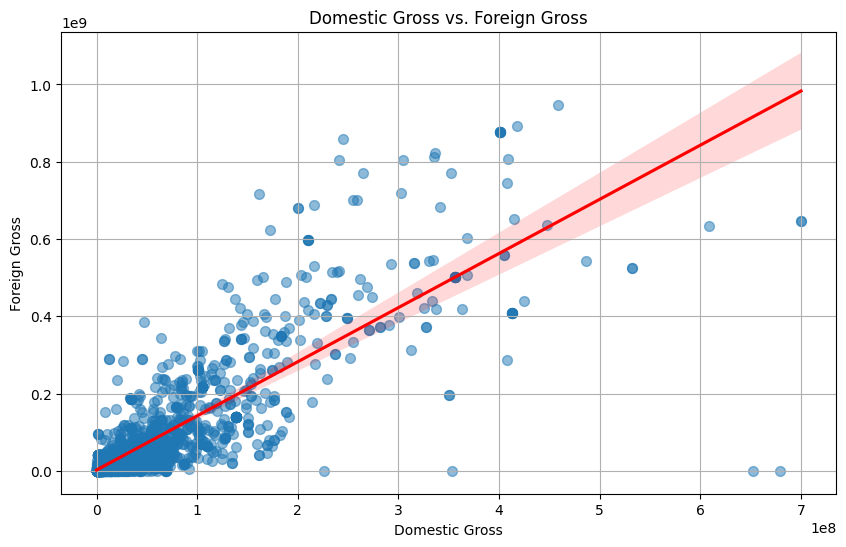

In [12]:
# plotting domestic_gross vs. foreign_gross
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='domestic_gross', y='foreign_gross', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Domestic Gross vs. Foreign Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.grid(True)
plt.show()

## **Scatter plot of Production Budget vs. Worldwide Gross**

As I did for the above plot, I wanted to visualize the correlation seen between `production_budget` and `worldwide_gross`. Below, it can be observed that the scatter plot shows a positive trend where higher production budgets are associated with higher worldwide gross, confirming that movies with higher budgets generally achieve higher earnings worldwide. 

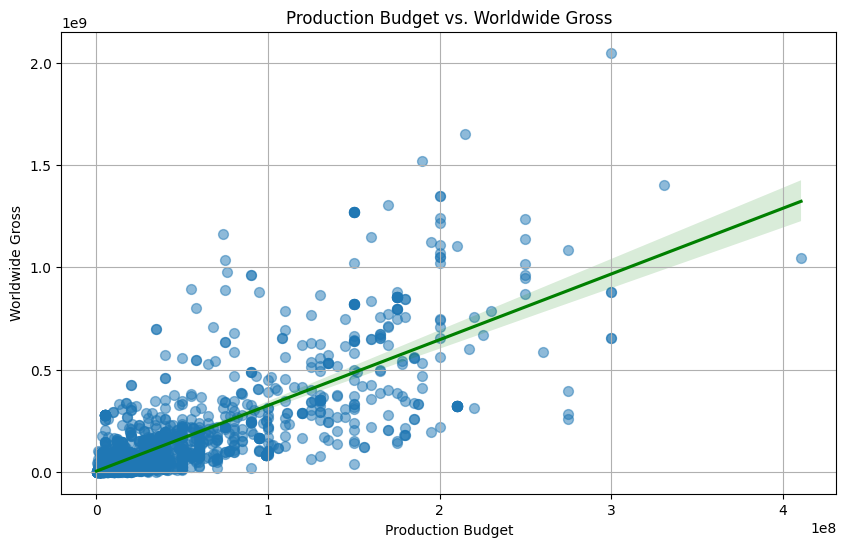

In [13]:
# plotting production_budget vs. worldwide_gross
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='production_budget', y='worldwide_gross', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'green'})
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()

## **Runtime Minutes vs. Number of Votes**

Below, the scatter plot created confirms that there is a moderate correlation between `runtime_minutes` and `num_votes`. The moderate positive correlation suggests that longer movies tend to get more votes, indicating higher popularity. This can assist in understanding the balance in how long a movie should be to maximize votes, while keeping `production_budget` afforable. 

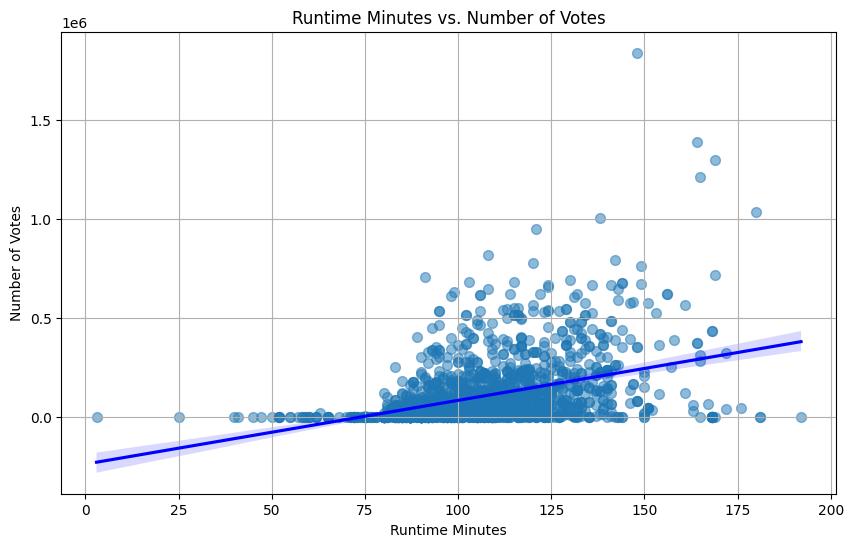

In [14]:
#plotting runtime_minutes vs. num_votes
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='runtime_minutes', y='num_votes', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'blue'})
plt.title('Runtime Minutes vs. Number of Votes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()

## **Bar Plot of Average Rating by Genre**

When plotting this for the first time, it was observed that there was a extremely large amount of `genre_ids`. This caused the visualization to be unreadable. The solution I was able to find was filtering out genres with less than 10 movies listed under that `genre_ids` value. This made the visualization readable yet still informative. 

The below plot provides valuable information on what genres and sub-genres are performing the best based on the `average_rating`. This can be considered when planning movie productions. `genre_ids` with better `average_rating` values can be seen at the bottom of the chart.

In [15]:
# filtering out genres with less than a certain number of movies
genre_counts = merged_df['genres'].value_counts()
popular_genres = genre_counts[genre_counts > 10].index  # Adjust the threshold as needed
filtered_df = merged_df[merged_df['genres'].isin(popular_genres)]

# recalculating the average rating by genre
avg_rating_by_genre = filtered_df.groupby('genres')['average_rating'].mean().sort_values()

/var/folders/zn/029t67g13_lfp6k9m0vk559m0000gn/T/ipykernel_80996/2174772147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


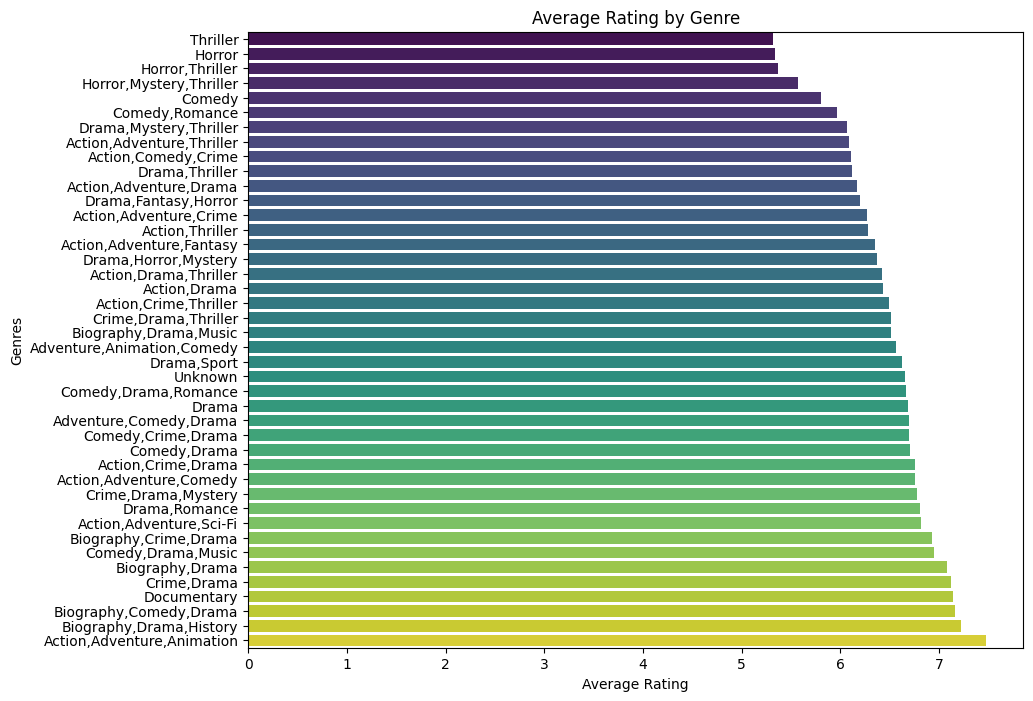

In [16]:
#plotting average_rating by genre_ids
plt.figure(figsize=(10, 8))
sns.barplot(
    y=avg_rating_by_genre.index,
    x=avg_rating_by_genre.values,
    palette="viridis"
)
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()

# **Summary**

## **Objective**
The primary goal of this EDA was to identify significant factors that influence a movie's worldwide gross using various provided datasets.

## **Key Findings**
1. **Correlation Heatmap**:
   - **Domestic Gross and Foreign Gross**: Strong positive correlation (0.83), indicating that movies successful domestically tend to do well internationally.
   - **Production Budget and Worldwide Gross**: High correlation (0.79), suggesting that higher production budgets usually lead to higher earnings.

2. **Scatter Plots**:
   - **Domestic Gross vs. Foreign Gross**: A clear positive relationship, indicating that successful movies domestically are also successful internationally.
   - **Production Budget vs. Worldwide Gross**: Higher budgets are generally associated with higher worldwide earnings.
   - **Runtime Minutes vs. Number of Votes**: Longer movies tend to receive more votes, indicating higher viewer engagement.

3. **Average Rating by Genre**:
   - **High Average Ratings**: Genres such as Biography-Drama-History and Action-Adventure-Animation have higher average ratings.
   - **Low Average Ratings**: Genres like Thriller and Horror have lower average ratings.

## **Recommendations**
1. **Increase Production Budgets**: Allocate higher budgets to projects. This can potentially lead to higher worldwide gross and overall success.

2. **Focus on High-Rating Genres**: Prioritize producing movies in genres like Biography-Drama-History and Action-Adventure-Animation, which have shown to receive higher average ratings. This could attract more viewers and positive reviews.

3. **Optimize Movie Length**: Ensure movies have a runtime that balances viewer engagement with storytelling. Longer movies tend to receive more votes, indicating higher engagement, but must also maintain quality to prevent viewer fatigue.

By implementing these recommendations, the studio can aim to maximize both the critical and financial success of its future projects.